In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [ ]:
audio_files = glob('/content/drive/MyDrive)

SyntaxError: ignored

In [ ]:
ipd.Audio(audio_files[0])

In [ ]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [ 3.7723145e-04  3.6909571e-04  4.8803544e-05  1.7791157e-04
  4.8743561e-05  3.1685337e-04  3.8401966e-04 -2.1095196e-04
 -5.4157944e-04 -4.7865757e-04]
shape y: (195894,)
sr: 22050


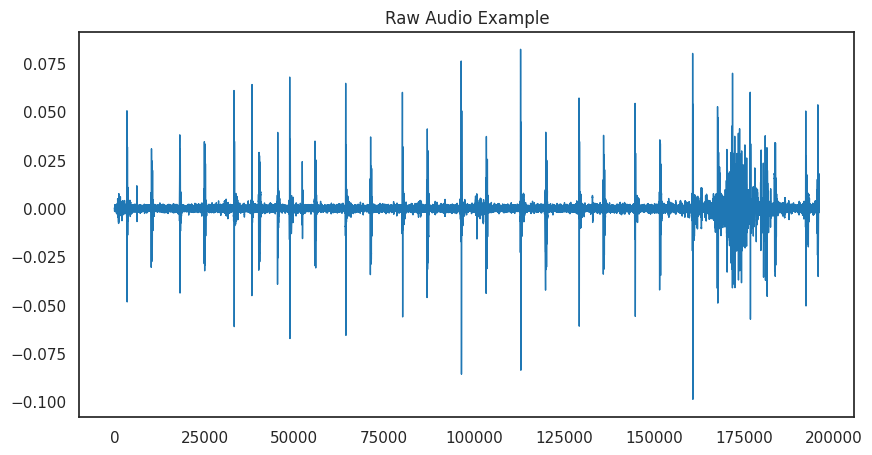

In [ ]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

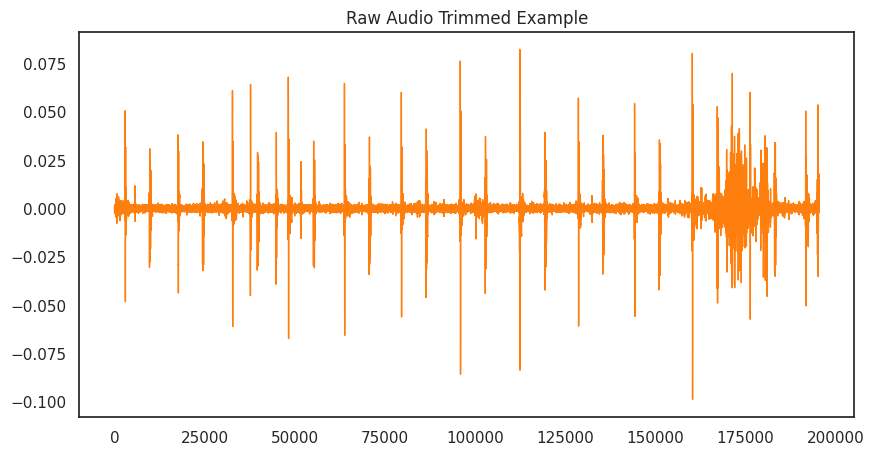

In [ ]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

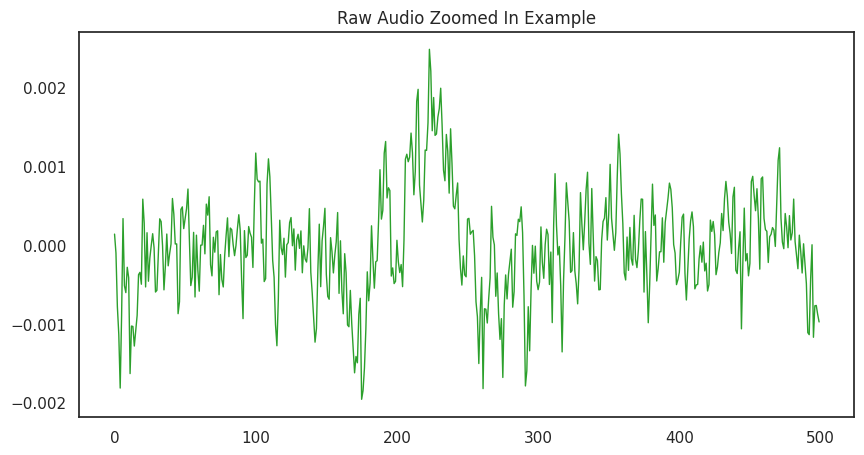

In [ ]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

In [ ]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 383)

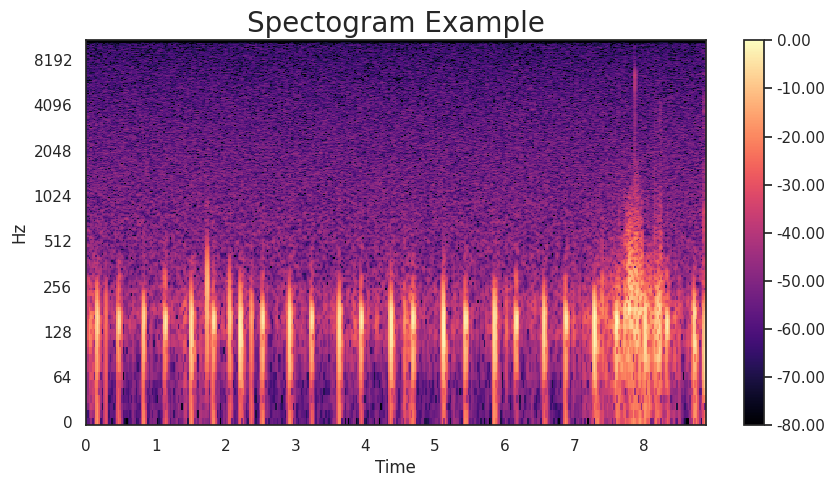

In [ ]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
S = librosa.feature.melspectrogram(y=y,
                                   sr=sr,
                                   n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

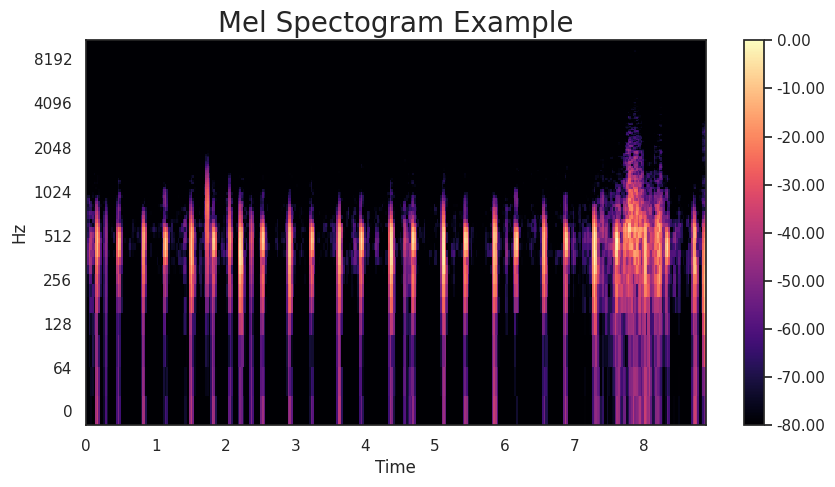

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [ ]:
import librosa
#path of the audio file
audio_data = '/content/drive/MyDrive/Atraining_normal/201101070538.wav'
#This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ
x = librosa.load(audio_data, sr=None)

#We can change this behavior by resampling at sr=44.1KHz.
# x = librosa.load(audio_data, sr=44000)

390899


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
#plotting the sampled signal
x = np.array(x)
librosa.display.waveshow(x, sr=sr)

<ipython-input-31-543ed33d9dc0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


ParameterError: ignored

<Figure size 1400x500 with 0 Axes>

In [ ]:
#x: numpy array
X = librosa.stft(x)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

ParameterError: ignored

In [ ]:

#min = minimum value for each row of the vector signal
#max = maximum value for each row of the vector signal
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

AttributeError: ignored

###https://www.analyticsvidhya.com/blog/2017/11/heart-sound-segmentation-deep-learning/

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import fnmatch
from sklearn import svm

In [ ]:
os.chdir("/content/gdrive/MyDrive/ALDA/LubDub")

In [ ]:
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [ ]:
ls

Atraining_artifact/  Atraining_extrahls/  Atraining_murmur/  Atraining_normal/


In [ ]:
def decodeFolder(category):
  print("Starting decoding folder "+category+" ...")
  listOfFiles = os.listdir(category)
  listOfFiles = fnmatch.filter(listOfFiles, '*.wav')
  arrays_sound = np.empty((0,65))
  for file in listOfFiles:
    filename = os.path.join(category,file)
    print(filename)
    features_sound = extract_feature(filename)
    arrays_sound = np.vstack((arrays_sound,features_sound))
    print(arrays_sound.shape)
  return arrays_sound

In [ ]:
def extract_feature(file_name):
  print("Extracting "+file_name+" ...")
  # arrays_sound = np.empty((0,193))
  X, sample_rate = librosa.load(file_name)
  stft = np.abs(librosa.stft(X))
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
  # mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
  tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
  arrays_sound = np.hstack((mfccs,chroma,contrast,tonnetz))
  print(arrays_sound.shape)
  return arrays_sound

In [ ]:
normal_sounds = decodeFolder("Atraining_normal")
normal_labels = [0 for items in normal_sounds]
murmur_sounds = decodeFolder("Atraining_murmur")
murmur_labels = [1 for items in murmur_sounds]
artifact_sounds = decodeFolder("Atraining_artifact")
artifact_labels = [2 for items in artifact_sounds]
extrahls_sounds = decodeFolder("Atraining_extrahls")
extrahls_labels = [3 for items in extrahls_sounds]
# train_sounds = np.concatenate((normal_sounds, murmur_sounds))
# train_labels = np.concatenate((normal_labels, murmur_labels))

In [ ]:
artifact_labels = [2 for items in artifact_sounds]
extrahls_labels = [3 for items in extrahls_sounds]

In [ ]:
train_sounds = np.concatenate((normal_sounds, murmur_sounds, artifact_sounds, extrahls_sounds))
train_labels = np.concatenate((normal_labels, murmur_labels, artifact_labels, extrahls_labels))

In [ ]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
test_sound = decodeFolder("Aunlabelledtest")

In [ ]:
clf =svm.SVC()
clf.fit(train_sounds,train_labels)
print("training done")
print(clf.predict(test_sound))

training done
[0 0 1 0 1 0 2 2 0 2 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 2 2 0 2 2 1 2 2
 1 2 1 2 1 0 0 0 0 1 1 1 2 1 1]
